# COGS 108 - California house price analyze

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [X] NO - keep private

# Overview

Our project is focus on find the factor that most influence a house price in California based on our dataset. Our dataset have 14 attributes, and we want to use them to figure out each attribute may or may not influence the California median house value, to what extend we need to plot the graph to see the association between the select attributes and California house price. In addition, we use corr() to calculate the covariance maxtrice among the attributes and median house value. It give us more straight forward to catch how those attributes infulence the median house price. Finally, we figure out that the median income is the most positive correlated with the median house value and the distance to coast is the most negative correlated with the median house value, also the house longtitude and latitude near the sea also do the positive correlated with the house price.

# Names

- Fangcheng Dou
- Kevin Yu
- Yinghui Sun
- Wen Lin
- Weihua Pan

<a id='research_question'></a>
# Research Question

How would each factor of a house vary the price of housing in California? Which is the positive correlated or negative correlated with the house price in California?

<a id='background'></a>

## Background & Prior Work

As a student at school, I am about to step out of the society and enter the workplace. In the current era of inflation, various prices are increasing rapidly. We have to start planning for our future. For some people, there are times in life. There are many major events, one of which is to own your own house. But the price of a house depends on many reasons, which is dazzling, and even most people cannot accurately estimate the price of a house.

We are devoted to analyzing the price of houses in California and the differences in house prices caused by various factors such as median income, total rooms, distance to LA and so on. We are interested in this because many graduates are complaining about the increase in house prices and the false quotations caused by people's unprepared perception of the value of houses.It is also a factor that causes market confusion. Some people miss their favorite houses because they don’t know the specific value of the house.Therefore, we think such a data that predicts house prices can help people get more information and get a general understanding when buying a house. The Los Angeles Metro Area had a year-over-year price gain of 11.7 percent, with the median price being 725,000 dollars. (1)The typical home value of homes in California is 774,899 dollars. This value is seasonally adjusted and only includes the middle price tier of homes. California home values have gone up 22.0% over the past year. (2) These increases in house prices have caused a lot of stress for us now students, and even we are worried Is it affordable. In March 2022, San Diego home prices were up 28.6% compared to last year, selling for a median price of $900K. On average, homes in San Diego sell after 8 days on the market compared to 9 days last year. There were 1,351 homes sold in March this year, down from 1,484 last year. (3) So we should understand the market as early as possible, and use this to help us prepare to locate the house price, if we meet the right one, we can seize the opportunity. 

References (include links):
- 1) https://www.noradarealestate.com/blog/california-housing-market/
- 2) https://www.sandiegomagazine.com/neighborhoods/lets-talk-san-diego-housing-prices/article_64ee595a-ac7c-11ec-b3ae-23556f34f1de.html
- 3) https://www.redfin.com/city/16904/CA/San-Diego/housing-market

# Hypothesis


The information obtained from the data enable us made to analyze the price range of the house and analyze which factor can cause the positive correlated with the house value in California and which factors do the negative correlated with the house price.

For example, the size of the house, the number of rooms,  the area of the land, whether it is close to the sea, and the geographical location of the house will affect the price trend of the house. At present, we all think that the house close to the sea will be much more expensive than the house not close to the sea. And we think the total rooms also makes the house price increase. 
Since our data is come from kaggle, so if the data have any bias, then our analyze will also have some bias.

# Dataset(s)


- Dataset Name: California Housing Prices Data.
- Link to the dataset: https://www.kaggle.com/datasets/fedesoriano/california-housing-prices-data-extra-features
- Number of observations: 20640

This is the dataset is a modified version of the California Housing Data used in the paper Pace, R. Kelley, and Ronald Barry. Sparse spatial autoregressions. Statistics & Probability Letters 33.3 (1997): 291-297.The data contains information from the 1990 California census. 

1) Median House Value: Median house value for households within a block (measured in US Dollars)

2) Median Income: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

3) Median Age: Median age of a house within a block; a lower number is a newer building.

4) Total Rooms: Total number of rooms within a block

5) Total Bedrooms: Total number of bedrooms within a block

6) Population: Total number of people residing within a block

7) Households: Total number of households, a group of people residing within a home unit, for a block

8) Latitude: A measure of how far north a house is; a higher value is farther north

9) Longitude: A measure of how far west a house is; a higher value is farther west

10) Distance to coast: Distance to the nearest coast point

11) Distance to Los Angeles: Distance to the centre of Los Angeles

12) Distance to San Diego: Distance to the centre of San Diego

13) Distance to San Jose: Distance to the centre of San Jose

14) Distance to San Francisco: Distance to the centre of San Francisco 

# Setup

In [108]:
## YOUR CODE HERE
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('talk')

import patsy
import statsmodels.api as sm

In [109]:
house = pd.read_csv('California_Houses.csv')
house.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


# Data Cleaning

Since we get the data from kaggle, so we just need to pop some column that we do not need so here we decide not to use total bedrooms since it is similar with the total rooms and we think the household is in our consideration as a factor, so we deed those two column. And, we check if there are any null values in our data, if null value exist, we need to delete them.

First, we have to take a look in our dataset

In [110]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
house

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


Below code for delete the column household and total bedrooms, the reason is just because we think the total bedrooms is similar with total rooms and the households is not the factor what we considered, so we delete them from our data.

In [111]:
## since our data not need Tot_Bedrooms, so we delete this Tot_Bedrooms column in our dataset.
## since our data not need Households, so we delete this Households column in our dataset.
house.pop("Households")
house.pop("Tot_Bedrooms")

0         129
1        1106
2         190
3         235
4         280
         ... 
20635     374
20636     150
20637     485
20638     409
20639     616
Name: Tot_Bedrooms, Length: 20640, dtype: int64

For below code, we want to find if there is any null value in our data, so we check them.

In [112]:
## since our data not need Households, so we delete this Latitude column in our dataset.
row = house[house.isnull().any(axis=1)]

In [113]:
row.shape

(0, 12)

In [114]:
row

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Population,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco


In [115]:
## since we want our data to be no null value, so use this to check if there is any null value.
house.isnull().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Population                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

since there is not null value, so we do not need to do anything

Then we output the dataset and to see after delete column and null value what is the dataset looks like now.

In [116]:
house

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Population,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,322,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,2401,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,496,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,558,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,565,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,845,39.48,-121.09,162031.481121,654530.186299,830631.543047,248510.058162,222619.890417
20636,77100.0,2.5568,18,697,356,39.49,-121.21,160445.433537,659747.068444,836245.915229,246849.888948,218314.424634
20637,92300.0,1.7000,17,2254,1007,39.43,-121.22,153754.341182,654042.214020,830699.573163,240172.220489,212097.936232
20638,84700.0,1.8672,18,1860,741,39.43,-121.32,152005.022239,657698.007703,834672.461887,238193.865909,207923.199166


In [117]:
house.head

<bound method NDFrame.head of        Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Population  \
0                452600.0         8.3252          41        880         322   
1                358500.0         8.3014          21       7099        2401   
2                352100.0         7.2574          52       1467         496   
3                341300.0         5.6431          52       1274         558   
4                342200.0         3.8462          52       1627         565   
...                   ...            ...         ...        ...         ...   
20635             78100.0         1.5603          25       1665         845   
20636             77100.0         2.5568          18        697         356   
20637             92300.0         1.7000          17       2254        1007   
20638             84700.0         1.8672          18       1860         741   
20639             89400.0         2.3886          16       2785        1387   

       Latitude  Long

# Data Analysis & Results

For the data analysis, we start by see the data and compute the data to see the summary, because we want to have some basic idea about the data and its mean value and the data range. After that we need to decide which factors we need to focus, so we use hist plot to the some attributes relationship with its count, if the distuibute is abnormal, we will focus on that distribute. In addition, we need to use implot to see the if any association between the select attribute with median house value. Then, since the longitude and latitude is a combination, so we plot them toghter can form a graph like map, and plot the median house value with it will provide us clearly view of which location has much higher median house price. Finally, we use corr() to calculate the correlated of each attribute with median house value and figure out the positive correlated and negative correlated. 

In [118]:
#show the head of dataset
house.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Population,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,322,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,2401,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,496,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,558,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,565,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


as we can see here, we have some attributes which is Median_House_Value is the median house value, Median_Income is the median income of the house owner, Median_Age is the house median age, the lower is most recently build, Tot_Rooms is total rooms, Population is the number of resident people here, Latitude which is the measure of how far north a house, the higher the farther, Longitude which is the measure of how far west a house, the higher the farther, Distance_to_coast, Distance_to_SanDiego, Distance_to_SanJose, Distance_to_SanFrancisco, all the distance is the distance from the house to the center of the city.

For below code.

the house.describe will computes and displays summary statistics, it will show us the min max and 25%, 50%, 75% and mean and count data for all those attribute.

In [119]:
#computes and displays summary statistics, it will show us the min max and 25%, 50%, 75%
# and mean and count, more clearly for us to see the data.
house.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Population,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,1425.476744,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,1132.462122,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,3.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,787.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928682,117395.477505
50%,179700.000000,3.534800,29.000000,2127.000000,1166.000000,34.260000,-118.490000,20522.019101,1.736675e+05,2.147398e+05,459758.877000,526546.661701
75%,264725.000000,4.743250,37.000000,3148.000000,1725.000000,37.710000,-118.010000,49830.414479,5.271562e+05,7.057954e+05,516946.490963,584552.007907
max,500001.000000,15.000100,52.000000,39320.000000,35682.000000,41.950000,-114.310000,333804.686371,1.018260e+06,1.196919e+06,836762.678210,903627.663298


From above the datasheet we can clearly see the summary statistics, and the most helpful one give us some bacis idea is the mean, it show the mean data for all attribute, such as we can know the mean of median house value is 206855, and the mean of the median income is 3.870671 etc.

So we want to plot some attributes and form a histgrapm to see if there are any relations we can find. X axis is the attribute and y axis is the count of each data.

array([[<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'Distance_to_coast'}>],
       [<AxesSubplot:title={'center':'Distance_to_LA'}>,
        <AxesSubplot:title={'center':'Distance_to_SanDiego'}>,
        <AxesSubplot:title={'center':'Distance_to_SanJose'}>],
       [<AxesSubplot:title={'center':'Distance_to_SanFrancisco'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

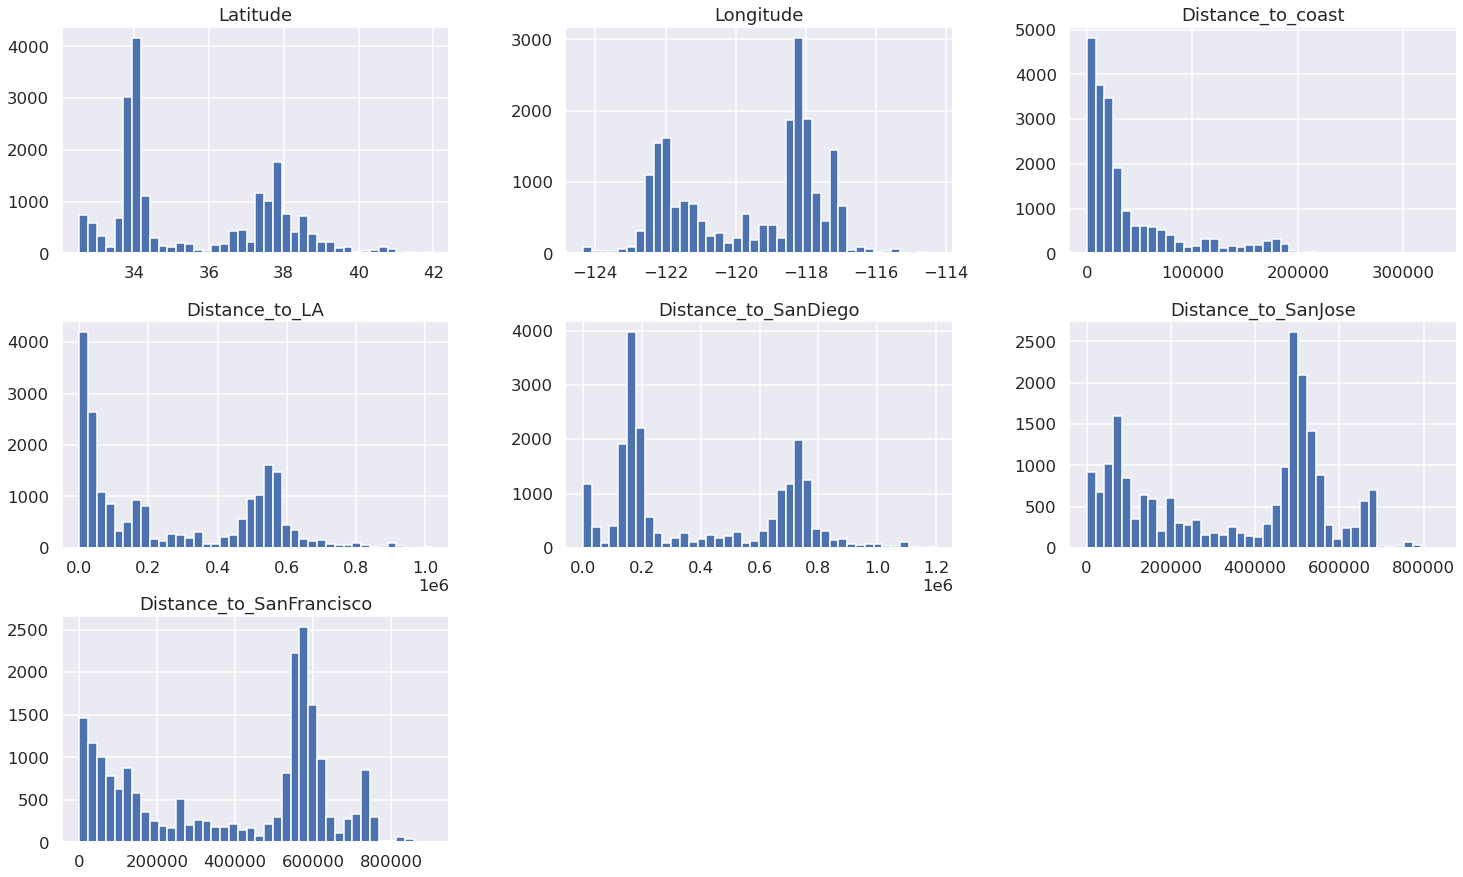

In [120]:
# plot a histogrom to see the value of select attribute and can see the in which area
# have more count, to see the distance which have more house shows.
sl = house.copy()
sl.pop("Median_House_Value")
sl.pop("Median_Income")
sl.pop("Median_Age")
sl.pop("Tot_Rooms")
sl.pop("Population")
%matplotlib inline
sl.hist(bins = 40, figsize=(25, 15))

From above graph shows that the counts of these data attribute are randomly distributed, only distance to coast is decreased from left to right, so we only need to keep distance to coast for further analysis

The code below is to see which few median house value has the most number of same median house value, right here we may get some idea about how the range of the median house value is the most.

In [121]:
# use value counts to count the common median house value and it will show us the most
# common median house value and how many of it.
house['Median_House_Value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: Median_House_Value, Length: 3842, dtype: int64

From the above output, we can clearly know that there are 965 of 500001.0 and 122 of 137500.0 house median value and so on, so we can not clearly know the mostly range of the median house value.

From above code, we can not know the mostly range of the median house value, so we use below histgram to make it clearly.

Text(0, 0.5, 'counts')

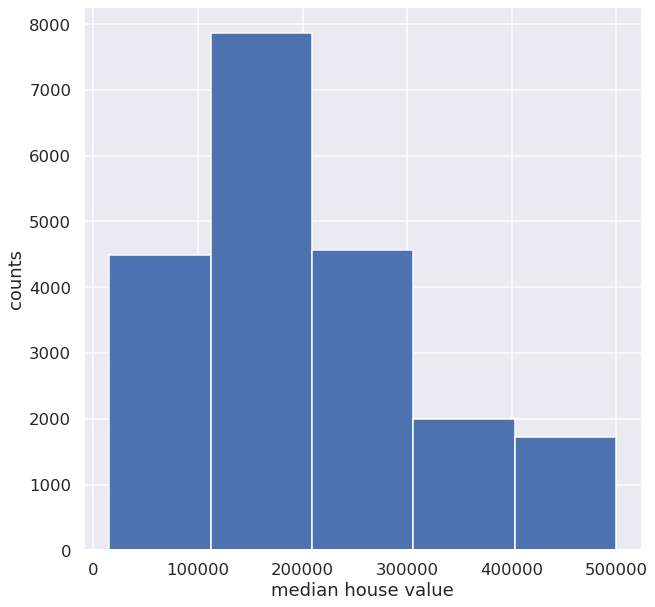

In [122]:
# show the median house value in histgram we can more clearly know the value range
# and we can see the most count in those value range
plt.figure(figsize=(10,10))
plt.hist(house['Median_House_Value'], bins = 5)
plt.xlabel('median house value')
plt.ylabel('counts')

From above histgram, we can clearly know that 100000-200000 has mostly range of the median house value.

So we try to see the house age range use the below graph to see the most of house age in the dataset

Text(0, 0.5, 'counts')

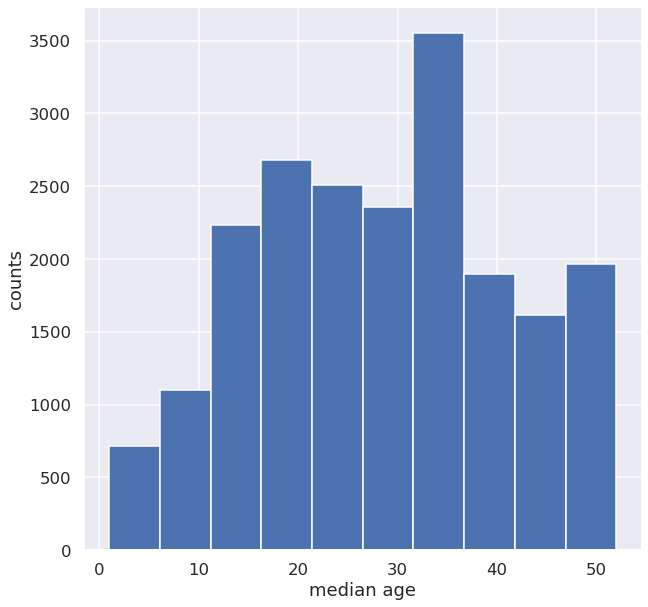

In [123]:
# the histgram help us to see the age range
plt.figure(figsize=(10,10))
plt.hist(house['Median_Age'])
plt.xlabel('median age')
plt.ylabel('counts')

After the graph, we can know that a lot of house range is between 20-40 years old, and we will plot graph use the code below to plot these two attribute for the median house value and median house age to see if the house age influence the house value or not.

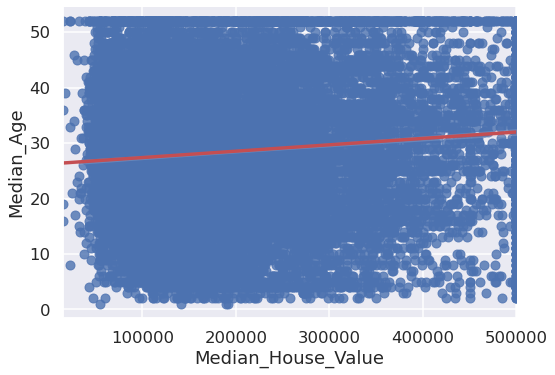

In [124]:
sns.lmplot(x="Median_House_Value", y="Median_Age", data = house, aspect = 1.5, line_kws={'color': 'r'})

After this graph, we can say that the median age influence the median house value really small, we can see the line keep going increase but increase a lot bit, so we know that the median age may do a postive influence with the house price but not too much. 

so we move to next attribute which is the median income and we want to know the range of the income which part is the most common median income

Text(0, 0.5, 'counts')

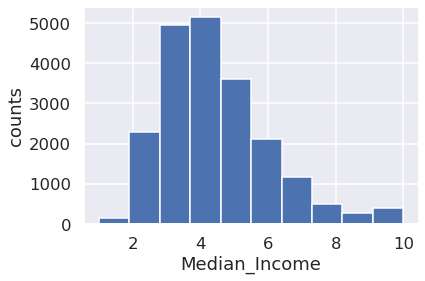

In [78]:
# round up the median income and filter those count less than 10 to avoid some data bias
# and this also show us in between which income area will have more counts.
house['income'] = np.ceil(house['Median_Income'])
house['income'].where(house['income'] < 10, 10 , inplace = True)
plt.hist(house['income'])
plt.xlabel('Median_Income')
plt.ylabel('counts')

we can clearly know that the income range betweeen 3-5 is the most common have most counts, so we want to figure it out if the income influence the median house value, so we use the below code to plot a graph and to check the relations between median house value and median income.

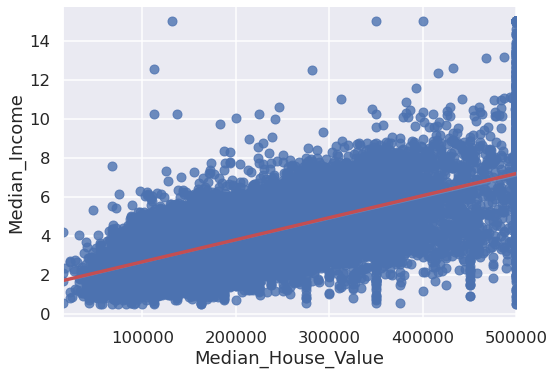

In [79]:
# from the output of corr() we can know that the median income is the most correlated with 
# median house value, so we plot these two and we can clearly to see the relation
# between thest two attribute.
sns.lmplot(y="Median_Income", x="Median_House_Value", data = house, aspect = 1.5, line_kws={'color': 'r'})

After this graph, we can clearly see that the median income is influence the median house value since the group have the trend that when the income going higher the median house value also going higher. So, we know that median income affect the median house value.

Text(0, 0.5, 'counts')

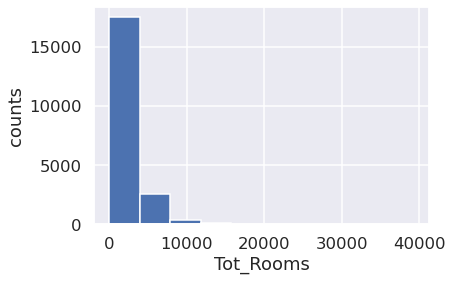

In [80]:
# use hist plot to help us have more clearly view on total rooms and to see which range has 
# more count in total rooms
plt.hist(house['Tot_Rooms'])
plt.xlabel('Tot_Rooms')
plt.ylabel('counts')

the asbove code and graph is to see the count of the total rooms for those house, and we can know that the count is almost the same range, so we think it is not affect the median house value.

Text(0, 0.5, 'counts')

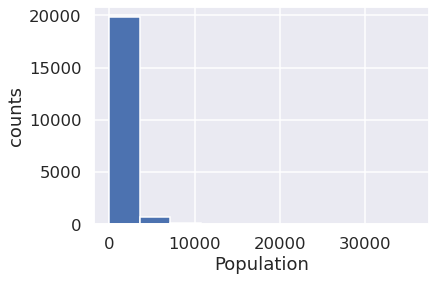

In [81]:
# we can see the population count, help us to figure will population affect house value
plt.hist(house['Population'])
plt.xlabel('Population')
plt.ylabel('counts')

the above code and graph is also show us the range of the population in the block of the dataset house and the range distuibute is almost the same, they all under 5000, so it also not affect the median house value.

So, we move to next attribute, the attribute longitude and latitude is the longitude and latitude in the map, so we have to combine those two to make a graph map, and we plot the median house value in this graph. The x axis is longitude and the y axis is latitude, the plot is median house value.

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

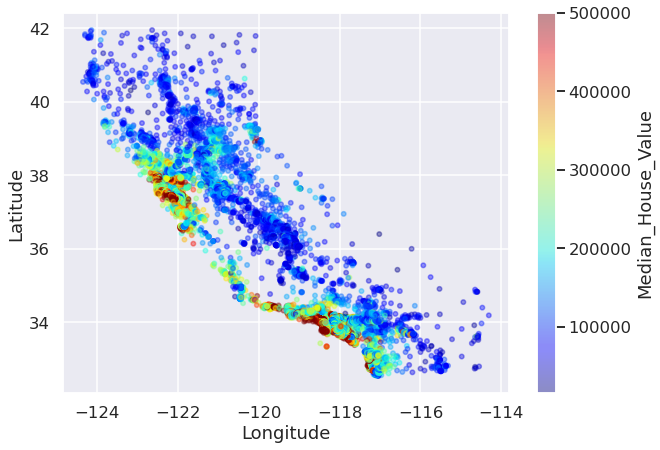

In [82]:
# plot the median house value with longitude and latitude to make a graph would have more
# clearly to see the higher median house value located.
house.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
    figsize=(10,7),
    c="Median_House_Value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

After this graph shows, we can see that the x axis is our longitude and the y axis is our latitude, the plot is median house value, and the colorbar shows the different color with different house value range. The red is the most expensive house value and the blue is the lowest. So, we can know from this graph is that there is a line which a lot of expensive median house value under the other plots, if we look into the map, that area is close to the ocean, so we know the area close to the ocean will cause the higher house value.

So ,we want to overall to see the all attributes correlated to the median house value except the latitude and longitude because these two we already showed and it have to combined together, so we need to use corr() to caculate the correlated and outpout the result.

In [83]:
# use corr() to compute and attribute and to see the correlated to the median house value
# the output will show us each attribute and the value between 1 to -1, which 1 is the most
# correlated and 0 is no correlated. And -1 means that negative correlated.
house.pop('income')
house.pop('Longitude')
house.pop('Latitude')
c = house.corr()
s = c['Median_House_Value'].sort_values()
s

Distance_to_coast          -0.469350
Distance_to_LA             -0.130678
Distance_to_SanDiego       -0.092510
Distance_to_SanJose        -0.041590
Distance_to_SanFrancisco   -0.030559
Population                 -0.024650
Median_Age                  0.105623
Tot_Rooms                   0.134153
Median_Income               0.688075
Median_House_Value          1.000000
Name: Median_House_Value, dtype: float64

since the corr() will output 1 to -1, which -1,1 is the most correlated to the median house value, and 0 is the least correlated, so we can clearly see from the output result, the median income is the most postive correlated to the median house value which means that the median income increase the median house value increase.Moreover the median age and total room are really small positive correlated with the median house value. In addition, population, distance to SanFrancisco, distance to SanJose, and distance to San Diego, distance to LA has a little bit negative correlated for the median house value, and the distance to coast may affect the median house value since it is the most negative correlated with the median house value, which is means that the far from the center of the city, the lower the median house value.

We already make some graph for the relation of median income and median house value, which is the most positive correlated with the median house value which will cause the median income increase in the area will lead the median house value increase, but the distance to the coast is the most negative which is the more far from the coast, then lower the median house value, so we generate a plot to see the distance to coast will affect the median house value.

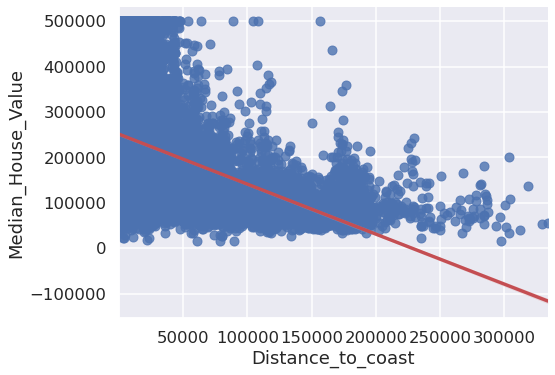

In [107]:
#from the output of corr() we can know that distance to coast is the most negative 
# correlated with median house
# value, so we plot it out to see how the distance to coast affect the value.
sns.lmplot(y= 'Median_House_Value', x = 'Distance_to_coast', data = house, aspect = 1.5, line_kws={'color': 'r'})

From above graph, we can clearly know that the distance to coast from 0- 100000 have all kinds of median house value, but after that, with the distance become more far, the house become less and the median house value become lower, so we know that the distance to coast is the more far from the center of coast, the lower the median house value.

Text(0, 0.5, 'attributes')

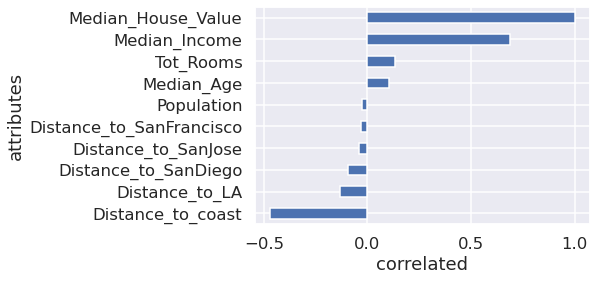

In [25]:
# we plot all the correlated attribute into barplot and we can see the graph clearly show us 
# that there were few attribute did influence the house value, which is median income total
# total rooms and median age.
s.plot(kind = 'barh')
plt.xlabel('correlated')
plt.ylabel('attributes')

this picture so we use graph to show the correlated of those attribute with median house value to help to see more clearly which has most positive correlated and which has most negative correlated.

# Ethics & Privacy

In order to prevent user data privacy from being violated, we only keep the house information for the house, that is, the number of rooms, the area of the land, whether it is close to the sea, the price, and some information that helps us analysis the price. We will only keep the information for forecasting demand, No information about personal privacy will be retained to ensure that the privacy of users will not be violated and incidents of privacy leakage will not occur.We will try our best to ensure that it will not violate the ethics and privacy issues of the Internet. 

This project is education project, only use for this course and it will privite the project to prevent other peoples use it to affect the market or use it as business project.
This analyze may did not cover other factors for the house price, it may have thical issues, since the factors will lead some analyze bias and may change the result of the analyze.

# Conclusion & Discussion

In recent years, with the threat of pandemic, more and more companies have announced the policy of work from home. The increase of inflation, and the reduction of bank interest have caused more and more people to buy real estate. This also makes the house value grow more and more rapidly, which has caused our concern and our thinking about the future house purchase plan. So we decided to analyze the relationship between house prices and some factors, trying to give us a basic idea of the variables that affect the house. We assume that the house close to the sea will be much more expensive than the house not close to the sea. And we think the total rooms also makes the house price increase.

First, we need to clean the dataset and analyze it. We think, in this dataset, total bedrooms and total rooms are a bit repetitive, they are very similar, so we need to delete total bedrooms. Also we feel that household is not in our consideration, so we also need to delete this, delete these two columns and do not analyze them further. In order to analyze the impact of these factors on house prices, first, we need to look at the mean of these data, so that we will have some bacis idea of the median data of the house in the dataset. Then we need to use graph to combine some related attribute data with median house value, where we can use graph to show whether there is an association between them. We plot median income and median house value, we find median from trend The influence of income on the median house value is relatively large, but when we plot the median age, we find that the influence between the median age and the median house value is small. As for total rooms and population, we counted these two datasets and found that they are generally concentrated in a range, so it means that total rooms and population have no effect on the median house value, so no further analysis will be done. Then we bring longitude and latitude into the graph to form a small map, and then plot median house value in this graph, using different color gradients to represent the range of median house value. From this analysis, we know that latitude and longitude houses near the sea are more expensive, so relying on the sea is a positive correlation to the price of houses. Finally, we use corr() to calculate their correlated, -1 is the most negative correlated, 1 is the most positive correlated, 0 is the least correlated to the median house value. Overall, we get the conclusion, median income is the most positive correlated to median house value, median age and total rooms is small positive correlated to median house value, and the distance to coast is the most negative correlated with median house value, population, distance to SanFrancisco, distance to San Jose, and distance to San Diego, distance to LA has a little bit negative correlated for the median house value. So, the median income higher in one, the median house value will be higher and the distance more far away from the coast, the lower the median house value.

But our analysis is not entirely representative of real house prices. Because our analysis is based on data, if the data is biased, our analysis will also be biased. Moreover, there are some other factors that will affect the price of the house and are not included in this data, so we cannot accurately analyze the exact price range of the house. We can only say in this data, which aspects of the factors will It has an impact on housing prices, and the data on housing prices is only part of it, not all, so the prediction of housing prices will have an impact.

If we want to further expand our project, we think we will add the function of house price prediction to this project, because we think this will be a very useful function, and we can't always do a lot of calculations to analyze house prices. But if we make this function, we only need to input some conditions to get the price range of the house. This is undoubtedly extremely convenient, and it is also a very interesting project. It can also help us predict the value of the house more conveniently and accurately.

# Team Contributions

Kevin Yu - Research Question, Hypothesis, Background & Prior Work

Fangcheng Dou - Conclusion & Discussion, set up, data cleaning

Yinghui Sun - Data analysis & result , team expectation

Wen Lin - Overview, data analysis

Weihua Pan - Hypothesis, EDA